### Preliminary Analysis

- **Project Foundation**: Our project begins with a comprehensive analysis of EEG data collected under various protocols. This foundational step is critical for achieving seamless EEG-based game control in the Floppy Bird game.

- **Focus on Blink Detection**: We have prioritized the detection of blink-related events as a trigger for the bird's jump. This method is tested for its feasibility and effectiveness in real-time control scenarios.

- **Model Selection and Development**: A RandomForest model was chosen and developed for its robustness in handling complex, non-linear relationships and its resistance to overfitting—qualities essential for rapid response requirements.

- **Evaluation of Initial Results**: The encouraging results from our preliminary RandomForest model indicate a strong potential for accurately tracking blinks. These positive outcomes validate proceeding to the next phase of our project.

- **Next Steps**: Success in this initial phase supports our move towards more sophisticated analyses, where we aim to predict a player's jumping intentions based on subtle EEG signal patterns. This advancement is key to enhancing the game's interactivity through neural control.


In [16]:
import data_handler as handler
import model_training as trainer
import pickle as pk
import importlib
importlib.reload(handler)
importlib.reload(trainer)

<module 'model_training' from 'C:\\Users\\user\\Desktop\\EEG-EyeBlinks-public\\EEG-EyeBlinks\\EEG-CIA\\model_training.py'>

### data analysis:

In [2]:
data_handler = handler.DataHandler()
dataset = data_handler.load_data()

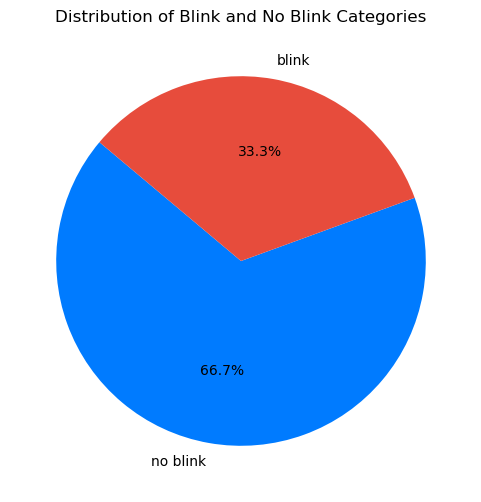

In [3]:
handler.pie_chart(dataset)

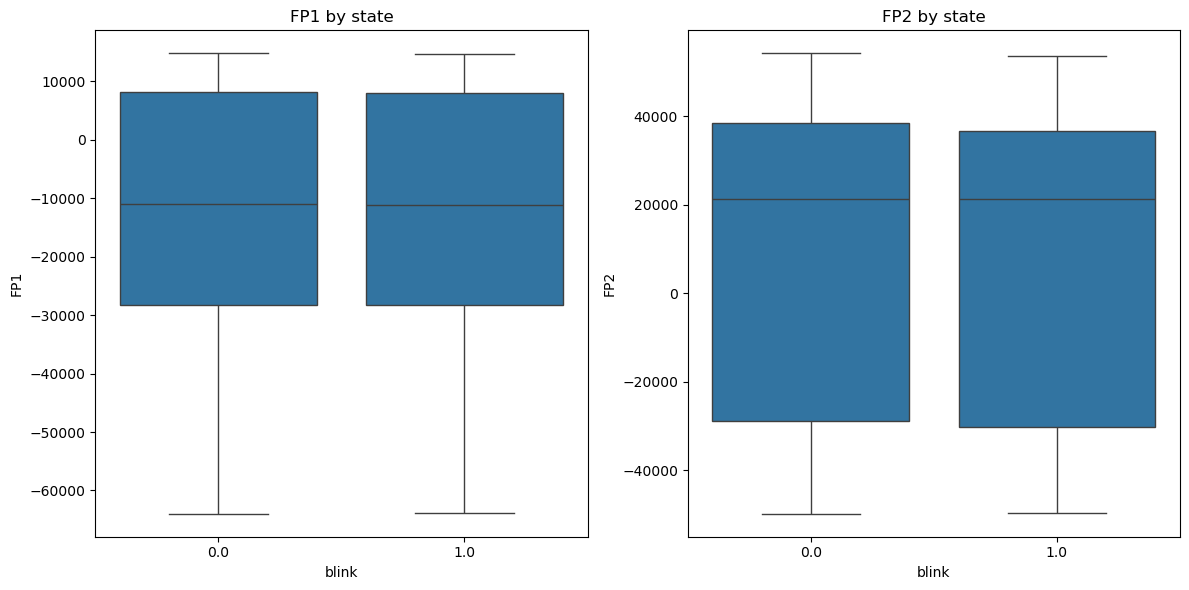

In [4]:
handler.boxplot(dataset)

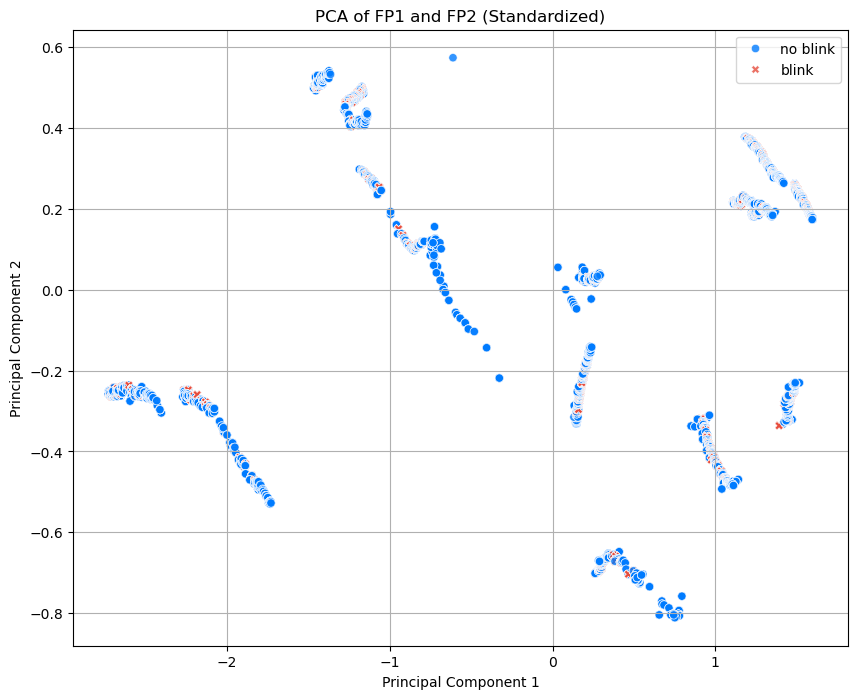

In [5]:
handler.pca_drawer(dataset)

In [8]:
#model training evolution
randomforest = trainer.RandomForestModel(dataset)
models, results = randomforest.train_model_per_set()

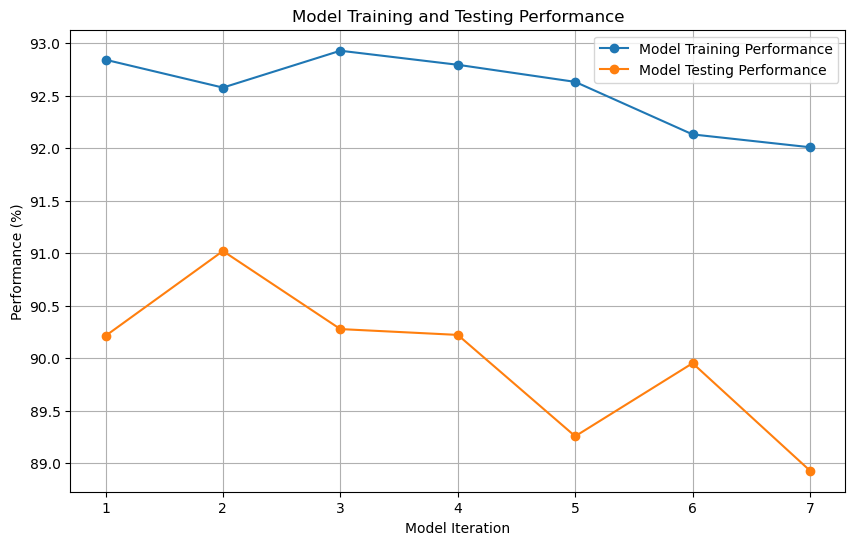

In [9]:
handler.results_evolution(results)

In [11]:
#generating training and test dataset
#the train-test split is 80%-20%
X_train, X_test, y_train, y_test = handler.generate_trainSet(dataset)
model = models[-1]
handler.performance(model, X_train, X_test,y_train, y_test)

training performance = 92.009%
test performance = 88.927%


<Figure size 1000x800 with 0 Axes>

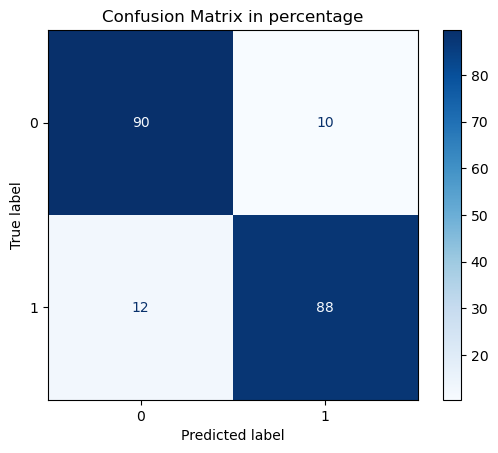

In [12]:
handler.confusion_matrix(model, X_test, y_test)

In [14]:
with open('blink_model.pkl', 'wb') as f:
    pk.dump(model, f)